# Load Data, Data Wrangling, Train Dataset and Test Dataset Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier  
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time
a = time.time()

In [2]:
RegularSeason_df = pd.read_csv('RegularSeasonDetailedResults.csv')
Tourney_df = pd.read_csv('TourneyDetailedResults.csv')

In [3]:
RegularSeason_df = RegularSeason_df.drop(['Season', 'Daynum', 'Wloc', 'Numot'], axis = 1)
Tourney_df = Tourney_df.drop(['Season', 'Daynum', 'Wloc', 'Numot'], axis = 1)

In [4]:
# Training Data
WinLosePair_df = RegularSeason_df

In [5]:
TrainDataOriginal_1_df = pd.DataFrame(WinLosePair_df[\
                                           ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
                                           'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']])\
.rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
                  'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
.reset_index(drop = True)

TrainDataOriginal_2_df = pd.DataFrame(WinLosePair_df[\
                                           ['Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf',\
                                           'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']])\
.rename(columns = {'Lfgm':'fgm_x', 'Lfga':'fga_x', 'Lfgm3':'fgm3_x', 'Lfga3':'fga3_x', 'Lftm':'ftm_x', 'Lfta':'fta_x', 'Lor':'or_x', 'Ldr':'dr_x', 'Last':'ast_x', 'Lto':'to_x', 'Lstl':'stl_x', 'Lblk':'blk_x', 'Lpf':'pf_x',\
                  'Wfgm':'fgm_y', 'Wfga':'fga_y', 'Wfgm3':'fgm3_y', 'Wfga3':'fga3_y', 'Wftm':'ftm_y', 'Wfta':'fta_y', 'Wor':'or_y', 'Wdr':'dr_y', 'Wast':'ast_y', 'Wto':'to_y', 'Wstl':'stl_y', 'Wblk':'blk_y', 'Wpf':'pf_y'})\
.reset_index(drop = True)


TrainData_df = TrainDataOriginal_1_df.append(TrainDataOriginal_2_df).reset_index(drop = True)
TrainData = TrainData_df.values
TrainLabel = np.ones((153272))
TrainLabel[76636:] = 2

In [6]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, TrainData, TrainLabel)
scores.mean() 

0.97283913828414

In [7]:
# Test Data
Season2018_df = pd.read_csv('2018.csv')
Season2018_df

,Rk,School,G,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf
0,1,Abilene Christian,32,27.187500,58.562500,6.656250,20.500000,12.687500,18.093750,9.531250,24.625000,15.062500,14.406250,8.125000,4.000000,20.968750
1,2,Air Force,31,23.645161,56.483871,8.064516,24.354839,13.161290,17.935484,9.741935,22.967742,14.354839,12.612903,6.483871,2.516129,17.967742
2,3,Akron,32,24.781250,56.968750,9.531250,26.500000,12.656250,18.187500,9.375000,23.937500,13.031250,13.750000,5.906250,2.531250,19.906250
3,4,Alabama A&M,31,21.709677,54.741935,5.870968,19.387097,11.129032,17.193548,10.580645,23.161290,10.967742,16.580645,3.967742,1.580645,16.322581
4,5,Alabama-Birmingham,33,28.636364,58.757576,6.757576,19.606061,12.818182,17.090909,10.121212,28.030303,16.939394,13.242424,5.393939,3.818182,14.848485
5,6,Alabama State,31,24.225806,59.290323,6.741935,20.580645,13.483871,20.870968,12.709677,23.774194,10.129032,14.096774,5.451613,4.193548,20.903226
6,7,Alabama NCAA,36,25.277778,54.861111,6.361111,19.500000,15.416667,23.000000,9.944444,25.888889,12.722222,14.250000,6.333333,5.333333,18.777778
7,8,Albany (NY),32,26.218750,57.375000,5.750000,15.687500,16.031250,21.250000,11.781250,25.437500,12.656250,11.593750,4.687500,2.843750,16.500000
8,9,Alcorn State,32,24.718750,57.000000,7.468750,21.781250,13.218750,18.687500,9.500000,25.000000,13.093750,14.343750,6.250000,2.656250,19.156250
9,10,American,30,23.266667,53.833333,7.966667,23.633333,10.866667,16.366667,7.933333,21.033333,12.233333,13.766667,7.233333,3.266667,18.333333


In [8]:
NCAA_df = Season2018_df[Season2018_df['School'].str.contains('NCAA')]
NCAA_df['School'] = NCAA_df['School'].map(lambda x: x.rstrip(' NCAA'))
NCAA_df

C:\Users\nizhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rk,School,G,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf
6,7,Alabama,36,25.277778,54.861111,6.361111,19.500000,15.416667,23.000000,9.944444,25.888889,12.722222,14.250000,6.333333,5.333333,18.777778
11,12,Arizona State,32,27.781250,60.000000,9.000000,24.781250,18.156250,24.781250,9.843750,25.375000,14.312500,10.718750,6.531250,3.562500,18.875000
12,13,Arizona,35,28.828571,57.257143,6.771429,18.342857,16.085714,21.171429,10.057143,26.428571,15.171429,12.171429,4.942857,4.514286,17.228571
16,17,Arkansas,35,28.714286,60.542857,7.685714,19.457143,15.428571,22.657143,10.000000,24.514286,14.314286,10.885714,6.228571,4.657143,20.000000
18,19,Auburn,34,26.647059,61.823529,9.529412,26.705882,19.029412,24.588235,11.852941,26.088235,14.147059,12.088235,7.411765,5.294118,19.764706
33,34,Bucknell,35,27.571429,58.571429,8.000000,22.971429,17.914286,24.914286,9.257143,27.342857,14.428571,12.485714,5.542857,4.342857,18.714286
34,35,Buffalo,36,30.694444,64.833333,9.750000,26.333333,13.500000,19.305556,11.833333,26.722222,16.583333,12.388889,6.250000,4.055556,20.972222
35,36,Butler,35,29.142857,61.571429,8.200000,23.000000,12.457143,16.057143,9.114286,25.114286,13.971429,11.171429,6.628571,2.857143,18.342857
38,39,Cal State Fullerton,32,25.125000,53.781250,5.218750,15.625000,16.968750,23.281250,8.625000,26.468750,12.593750,14.218750,6.281250,3.312500,18.062500
55,56,Cincinnati,36,26.222222,58.333333,7.277778,20.611111,14.527778,21.000000,13.250000,26.000000,15.833333,11.222222,7.111111,5.388889,15.583333


In [9]:
# South_df = pd.read_csv('South.csv')
# West_df = pd.read_csv('West.csv')
# East_df = pd.read_csv('East.csv')
# MidWest_df = pd.read_csv('MidWest.csv')

In [10]:
ncaa2018_df = pd.read_csv('ncaa2018.csv')
ncaa2018_df

,School_x,School_y,Results
0,Kansas,Penn,1
1,Seton Hall,North Carolina State,1
2,Clemson,New Mexico State,1
3,Auburn,College of Charleston,1
4,Texas Christian,Syracuse,2
5,Michigan State,Bucknell,1
6,Rhode Island,Oklahoma,1
7,Duke,Iona,1
8,Kansas,Seton Hall,1
9,Clemson,Auburn,1


In [11]:
# Tourney_df1 = Tourney_df.iloc[0 : 457]
# Tourney_df2 = Tourney_df.iloc[457 : ]
# TestDataOriginal_1_df = pd.DataFrame(Tourney_df1[\
#                                            ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
#                                            'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']])\
# .rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
#                   'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
# .reset_index(drop = True)

# TestDataOriginal_2_df = pd.DataFrame(Tourney_df2[\
#                                            ['Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf',\
#                                            'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']])\
# .rename(columns = {'Lfgm':'fgm_x', 'Lfga':'fga_x', 'Lfgm3':'fgm3_x', 'Lfga3':'fga3_x', 'Lftm':'ftm_x', 'Lfta':'fta_x', 'Lor':'or_x', 'Ldr':'dr_x', 'Last':'ast_x', 'Lto':'to_x', 'Lstl':'stl_x', 'Lblk':'blk_x', 'Lpf':'pf_x',\
#                   'Wfgm':'fgm_y', 'Wfga':'fga_y', 'Wfgm3':'fgm3_y', 'Wfga3':'fga3_y', 'Wftm':'ftm_y', 'Wfta':'fta_y', 'Wor':'or_y', 'Wdr':'dr_y', 'Wast':'ast_y', 'Wto':'to_y', 'Wstl':'stl_y', 'Wblk':'blk_y', 'Wpf':'pf_y'})\
# .reset_index(drop = True)

TestDataOriginal_1_df = pd.DataFrame(Tourney_df[\
                                           ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
                                           'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']])\
.rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
                  'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
.reset_index(drop = True)

TestDataOriginal_2_df = pd.DataFrame(Tourney_df[\
                                           ['Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf',\
                                           'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']])\
.rename(columns = {'Lfgm':'fgm_x', 'Lfga':'fga_x', 'Lfgm3':'fgm3_x', 'Lfga3':'fga3_x', 'Lftm':'ftm_x', 'Lfta':'fta_x', 'Lor':'or_x', 'Ldr':'dr_x', 'Last':'ast_x', 'Lto':'to_x', 'Lstl':'stl_x', 'Lblk':'blk_x', 'Lpf':'pf_x',\
                  'Wfgm':'fgm_y', 'Wfga':'fga_y', 'Wfgm3':'fgm3_y', 'Wfga3':'fga3_y', 'Wftm':'ftm_y', 'Wfta':'fta_y', 'Wor':'or_y', 'Wdr':'dr_y', 'Wast':'ast_y', 'Wto':'to_y', 'Wstl':'stl_y', 'Wblk':'blk_y', 'Wpf':'pf_y'})\
.reset_index(drop = True)
TestData_df = TestDataOriginal_1_df.append(TestDataOriginal_2_df).reset_index(drop = True)
TestData_df

,fgm_x,fga_x,fgm3_x,fga3_x,ftm_x,fta_x,or_x,dr_x,ast_x,to_x,...,fga3_y,ftm_y,fta_y,or_y,dr_y,ast_y,to_y,stl_y,blk_y,pf_y
0,32,69,11,29,17,26,14,30,17,12,...,31,14,31,17,28,16,15,5,0,22
1,31,66,7,23,11,14,11,36,22,16,...,16,7,7,8,26,12,17,10,3,15
2,31,59,6,14,16,22,10,27,18,9,...,28,14,21,20,22,11,12,2,5,18
3,29,53,3,7,18,25,11,20,15,18,...,17,12,17,14,17,20,21,6,6,21
4,27,64,7,20,15,23,18,20,17,13,...,21,15,20,10,26,16,14,5,8,19
5,17,52,4,14,20,27,12,29,8,14,...,17,11,13,15,26,11,11,8,4,22
6,19,54,4,13,25,31,13,27,4,16,...,11,18,22,11,24,8,19,5,4,19
7,20,47,6,14,28,37,8,28,12,12,...,27,7,10,13,22,13,10,7,6,24
8,24,56,5,14,12,14,15,23,15,14,...,24,8,13,17,18,10,14,6,5,16
9,28,51,2,6,6,11,7,20,13,11,...,17,9,10,13,19,13,13,6,1,15


In [13]:
Test_df = pd.merge(ncaa2018_df, NCAA_df, left_on = 'School_x', right_on = 'School', how = 'inner')
Test_df = pd.merge(Test_df, NCAA_df, left_on = 'School_y', right_on = 'School', how = 'inner')
Results = Test_df['Results'].values
TestLabel1 = np.ones((1, int(TestData_df.shape[0] / 2)))
TestLabel2 = np.ones((1, int(TestData_df.shape[0] / 2))) * 2
TestLabel = np.append(TestLabel1 , TestLabel2)
TestLabel = np.append(Results, TestLabel)

Test_df = Test_df.drop(['School_x', 'School_y', 'Rk_x', 'G_x', 'Results', 'Rk_y', 'G_y'], axis = 1)
Test_df = Test_df.append(TestData_df)
Test_df = Test_df.astype(int)
TestData = Test_df.values

In [14]:
clf.fit(TrainData, TrainLabel)
accuracy_score(TestLabel, clf.predict(TestData))

0.9558510638297872

total running time of this example is : 568.7861161231995


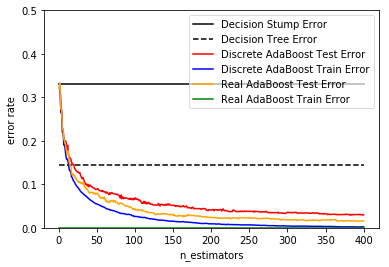

In [16]:
n_estimators = 400
learning_rate = 1
X_test,y_test = TestData, TestLabel
X_train,y_train = TrainData, TrainLabel
 
dt_stump=DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(X_train,y_train)
dt_stump_err=1.0-dt_stump.score(X_test,y_test)
 
dt=DecisionTreeClassifier(max_depth=9,min_samples_leaf=1)
dt.fit(X_train,y_train)
dt_err=1.0-dt.score(X_test,y_test)
 
ada_discrete=AdaBoostClassifier(base_estimator=dt_stump,learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME')
ada_discrete.fit(X_train,y_train)
 
ada_real=AdaBoostClassifier(base_estimator=dt_stump,learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME.R')
ada_real.fit(X_train,y_train)
 
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2,'k-',label='Decision Stump Error')
ax.plot([1,n_estimators],[dt_err]*2,'k--',label='Decision Tree Error')
 
ada_discrete_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i]=zero_one_loss(y_pred,y_test)    ######zero_one_loss
ada_discrete_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i]=zero_one_loss(y_pred,y_train)
 
 
ada_real_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i]=zero_one_loss(y_pred,y_test)
ada_real_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_discrete_err_train[i]=zero_one_loss(y_pred,y_train)
 
ax.plot(np.arange(n_estimators)+1,ada_discrete_err,label='Discrete AdaBoost Test Error',color='red')
ax.plot(np.arange(n_estimators)+1,ada_discrete_err_train,label='Discrete AdaBoost Train Error',color='blue')
ax.plot(np.arange(n_estimators)+1,ada_real_err,label='Real AdaBoost Test Error',color='orange')
ax.plot(np.arange(n_estimators)+1,ada_real_err_train,label='Real AdaBoost Train Error',color='green')
 
ax.set_ylim((0.0,0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
 
leg=ax.legend(loc='upper right',fancybox=True)
leg.get_frame().set_alpha(0.7)
b=time.time()
print('total running time of this example is :',b-a)
plt.show()